In [1]:
dataName = 'adani'
dataFrequency = '1h'
requiredMinimumCorrelation = .2
autoConfigFileRelativePath = '\\src\config\\autoConfig\\config.json'
KEY_finalTrainingFeaturesListFile='finalTrainingFeaturesListFile'
KEY_manuallyDecidedTrainingFeaturesListFile='manuallyDecidedTrainingFeaturesListFile'
prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile = '005'

TIME_STEPS_CONFIG=60
BATCH_SIZE_CONFIG = 512
LEARNING_RATE_CONFIG=0.001
EPOCHS_CONFIG = 40

print('done')

done


In [2]:
# Include python files defined in the library folder to help facilitate the stock price Prediction 
import os
import sys  

module_path = os.path.abspath('../../'+os.path.join('.'))

sys.path.append(module_path)

from utilities import *
from trainModel import *

print('done')

done


In [3]:
import pandas as pd
import numpy as np

from config.environment import getAppConfigData
from utilities.fileFolderManipulations import getJupyterRootDirectory

configFilePath = getJupyterRootDirectory()+'\\'+autoConfigFileRelativePath
autoConfigData = getAppConfigData()

trainingDataFilePath = autoConfigData[dataName][dataFrequency][KEY_manuallyDecidedTrainingFeaturesListFile]
trainingDataFilePath = trainingDataFilePath.replace('***',prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile)

print('trainingDataFilePath is >>> ' + trainingDataFilePath)

trainingDataDf = pd.read_csv(trainingDataFilePath)
try:
    trainingDataDf=trainingDataDf.drop(columns={'Unnamed: 0'})
except KeyError:
    pass

trainingDataDf.head()

 retrieving values configured in >>> C:\Users\kalagi01\Desktop\dev\eraiVersion2\\src\config\autoConfig\config.json
trainingDataFilePath is >>> C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures\005_manuallyDecidedFinalTrainingFeatureList.csv


,open,high,low,close,open_high_diff_exp_1,open_low_diff_exp_inv_1,close_low_diff_exp_inv_2,close_high_diff_exp_1,high_low_diff_exp_inv_2,data_magnitude,green_red_vector_pow_2,red_candle_magnitude_pow_4,green_candle_magnitude_pow_4
0,52.50,52.70,51.30,51.65,0.818731,0.301194,0.496585,0.349938,0.060810,26.020368,677.059531,458409.6089,0.0000
1,51.70,52.30,51.70,51.85,0.548812,1.000000,0.740818,0.637628,0.301194,25.944041,673.093281,0.0000,453054.5653
2,51.85,52.10,51.75,51.95,0.778801,0.904837,0.670320,0.860708,0.496585,25.956331,673.731094,0.0000,453913.5867
3,51.90,52.15,51.90,52.05,0.778801,1.000000,0.740818,0.904837,0.606531,26.000054,676.002813,0.0000,456979.8025
4,52.10,52.20,51.85,51.90,0.904837,0.778801,0.904837,0.740818,0.496585,26.006348,676.330156,457422.4803,0.0000


In [4]:
numberOfInputFeatures = trainingDataDf.shape[1]
numberOfOutputFeatures = 4

numberOfInputFeatures,numberOfOutputFeatures

(13, 4)

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(trainingDataDf["open"])
plt.plot(trainingDataDf["high"])
plt.plot(trainingDataDf["low"])
plt.plot(trainingDataDf["close"])
plt.title('Stock price history')
plt.ylabel('Price (Rupees)')
plt.xlabel('Days')
plt.legend(['open','high','low','close'], loc='upper left')
plt.show()
print('done')

<Figure size 1600x800 with 1 Axes>

done


Using TensorFlow backend.


checking if any null values are present
 open                            0
high                            0
low                             0
close                           0
open_high_diff_exp_1            0
open_low_diff_exp_inv_1         0
close_low_diff_exp_inv_2        0
close_high_diff_exp_1           0
high_low_diff_exp_inv_2         0
data_magnitude                  0
green_red_vector_pow_2          0
red_candle_magnitude_pow_4      0
green_candle_magnitude_pow_4    0
dtype: int64
Train and Test size 5010 3340
length of time-series i/o

W0110 21:30:11.970839   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0110 21:30:12.045845   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0110 21:30:12.053844   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



 (4950, 60, 13) (4950, 4)
length of time-series i/o (3280, 60, 13) (3280, 4)


W0110 21:30:13.103911   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



 checking if folder existis >>>C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures/logs


W0110 21:30:13.701951   504 deprecation.py:323] From C:\Users\kalagi01\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0110 21:30:15.102041   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0110 21:30:15.112041   504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4608 samples, validate on 1536 samples
Epoch 1/40
 - 5s - loss: 0.0555 - acc: 0.0766 - val_loss: 0.0734 - val_acc: 0.1849
Epoch 2/40
 - 2s - loss: 0.0371 - acc: 0.1832 - val_loss: 0.0617 - val_acc: 0.4870
Epoch 3/40
 - 1s - loss: 0.0352 - acc: 0.4889 - val_loss: 0.0581 - val_acc: 0.4870
Epoch 4/40
 - 2s - loss: 0.0341 - acc: 0.5184 - val_loss: 0.0560 - val_acc: 0.4889
Epoch 5/40
 - 1s - loss: 0.0328 - acc: 0.4208 - val_loss: 0.0539 - val_acc: 0.4857
Epoch 6/40
 - 1s - loss: 0.0317 - acc: 0.2884 - val_loss: 0.0517 - val_acc: 0.4714
Epoch 7/40
 - 1s - loss: 0.0305 - acc: 0.3941 - val_loss: 0.0493 - val_acc: 0.4844
Epoch 8/40
 - 1s - loss: 0.0288 - acc: 0.6578 - val_loss: 0.0465 - val_acc: 0.4831
Epoch 9/40
 - 1s - loss: 0.0270 - acc: 0.6363 - val_loss: 0.0431 - val_acc: 0.4805
Epoch 10/40
 - 1s - loss: 0.0246 - acc: 0.5994 - val_loss: 0.0389 - val_acc: 0.4785
Epoch 11/40
 - 1s - loss: 0.0218 - acc: 0.6111 - val_loss: 0.0337 - val_acc: 0.4733
Epoch 12/40
 - 1s - loss: 0.0179 - ac

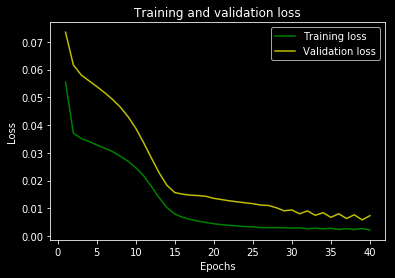

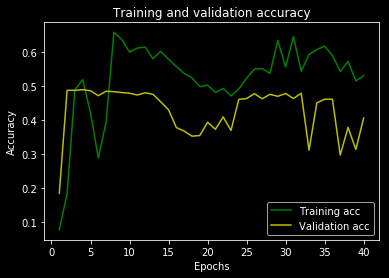

isSuccess >>> True


In [6]:
from trainModel.trainModel import trainLSTMModel
success, trainingData, min_max_scaler, x_t, y_t,x_test_t, y_test_t, lstm_model, history = trainLSTMModel(trainingDataFilePath, TIME_STEPS_CONFIG, BATCH_SIZE_CONFIG , LEARNING_RATE_CONFIG, EPOCHS_CONFIG)
print('isSuccess >>> ' + str(success))

In [7]:
predicted_values = lstm_model.predict(x_test_t, batch_size=512)
predicted_values.shape

(1536, 4)

In [8]:
dummy_cols_data = np.random.random((predicted_values.shape[0],numberOfInputFeatures-numberOfOutputFeatures))
predicted_values_adj = np.append(predicted_values, dummy_cols_data, 1)
predicted_values_orig_scale_withDummies=min_max_scaler.inverse_transform(predicted_values_adj)

y_test_t_adj = np.append(y_test_t, dummy_cols_data, 1)
y_test_t_orig_scale_withDummies=min_max_scaler.inverse_transform(y_test_t_adj)
print('done')

done


In [9]:
predicted_values_orig_scale= predicted_values_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
y_test_t_orig_scale= y_test_t_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
predicted_values_orig_scale.shape

(1536, 4)

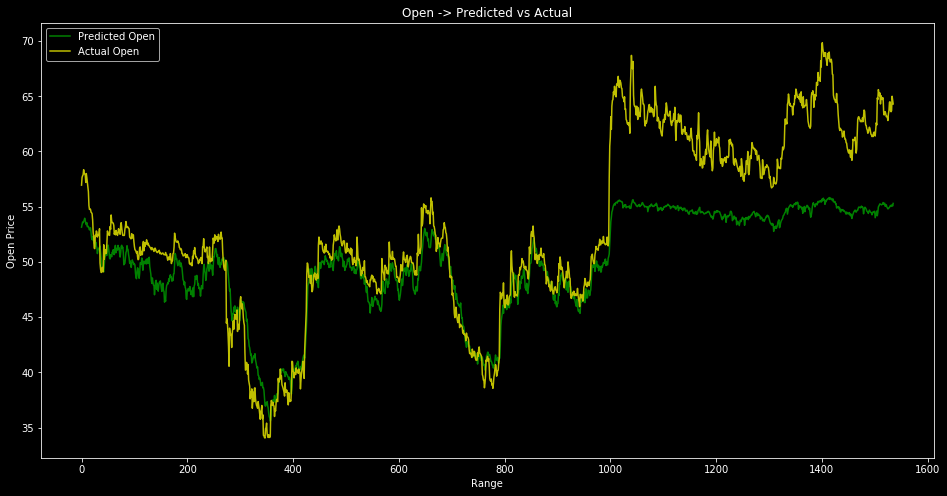

In [10]:
plt.figure(figsize=(16,8))
plt.clf()
predicted_open = predicted_values_orig_scale[:,[0]]
actual_open = y_test_t_orig_scale[:,[0]]

x_coord = [ index for index in range(predicted_values_orig_scale.shape[0]) ]

plt.plot(x_coord, predicted_open, 'g', label='Predicted Open')
plt.plot(x_coord, actual_open, 'y', label='Actual Open')
plt.title('Open -> Predicted vs Actual')
plt.xlabel('Range')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Save trained model for future use

In [11]:
import pickle
from utilities.fileFolderManipulations import getParentFolder
from utilities.fileFolderManipulations import createFolder

modelFolderPath=getParentFolder(trainingDataFilePath)+"\model"
modelFilePath = modelFolderPath+"\lstm_model_for_"+trainingDataFilePath[trainingDataFilePath.rfind('\\')+1:trainingDataFilePath.rfind('.csv')]+".sav"
createFolder(modelFolderPath)

pickle.dump(lstm_model, open(modelFilePath, 'wb'))
print('done')

 checking if folder existis >>>C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures\model
done


# Load Model from disk

In [12]:
import pickle
lstm_model_loaded = pickle.load(open(modelFilePath, 'rb'))
result = lstm_model_loaded.evaluate(x_t, y_t, batch_size=512)
actual = lstm_model.evaluate(x_t, y_t, batch_size=512)
print('done')
actual, result

4608/4608 [==============================] - 0s 64us/step
done


([0.0018097959303607543, 0.5828993055555556],
 [0.0018098385642386144, 0.5828993055555556])